In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 10s 1us/step


In [13]:
len(X_train)

60000

In [18]:
len(X_test)

10000

In [15]:
X_train[0].shape

(28, 28)

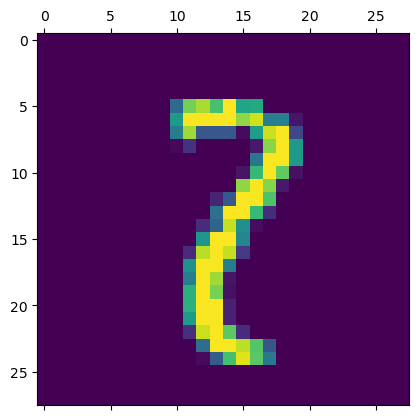

In [24]:
plt.matshow(X_train[588])

In [25]:
y_train[588]

2

In [34]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [36]:
X_train.shape

(60000, 28, 28)

In [42]:
X_train = X_train/255
X_test = X_test/255

In [43]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [46]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4733 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9257


In [48]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2651 - accuracy: 0.9276


[0.2650575637817383, 0.9276000261306763]

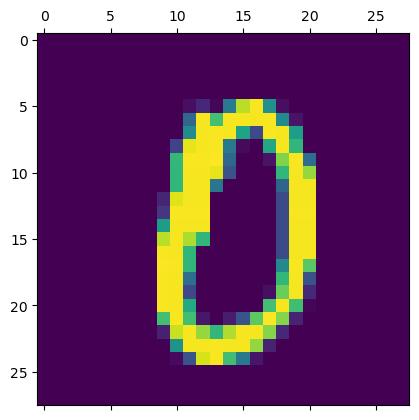

In [54]:
plt.matshow(X_test[55])

In [52]:
y_predict = model.predict(X_test_flattened)
y_predict

313/313 [==============================] - 0s 1ms/step


array([[1.7865030e-02, 2.7735163e-07, 7.2660945e-02, ..., 9.9985194e-01,
        9.2687778e-02, 7.0152169e-01],
       [3.2423341e-01, 6.1137145e-03, 9.9938142e-01, ..., 8.9139151e-13,
        1.0840602e-01, 2.1757212e-09],
       [2.7970009e-04, 9.9204189e-01, 6.8832868e-01, ..., 1.2518030e-01,
        3.2790682e-01, 4.5360859e-02],
       ...,
       [1.3210799e-06, 2.4280864e-06, 2.0341277e-03, ..., 2.1124166e-01,
        4.4651875e-01, 7.1595722e-01],
       [3.8905986e-05, 1.2878541e-04, 2.0931453e-04, ..., 4.1368527e-05,
        6.2144697e-01, 1.2611631e-04],
       [1.9851394e-03, 1.9381248e-10, 2.1708581e-01, ..., 8.0934273e-09,
        1.0095651e-04, 5.9451077e-07]], dtype=float32)

In [56]:
np.argmax(y_predict[775])

2

In [60]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [61]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [65]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,    8,    3,    3,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  939,   13,    8,    3,   12,    9,   31,    5],
       [   2,    0,   27,  918,    1,   21,    1,   10,   21,    9],
       [   1,    1,    4,    1,  925,    0,   10,    4,   10,   26],
       [   8,    3,    6,   36,   11,  765,   19,    6,   32,    6],
       [   7,    3,    7,    1,    7,   10,  921,    2,    0,    0],
       [   1,    6,   23,    5,    9,    0,    0,  956,    1,   27],
       [   4,    7,    9,   23,   10,   22,   10,   14,  869,    6],
       [   9,    7,    2,   11,   35,    4,    0,   23,    7,  911]])>

Text(95.72222222222221, 0.5, 'Truth')

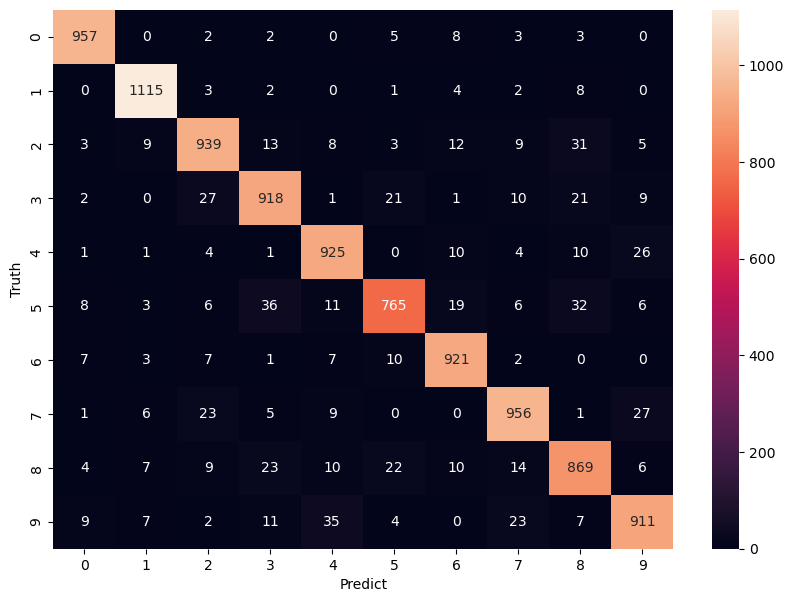

In [68]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predict")
plt.ylabel("Truth")